### Sentiment Analysis & Stocks Data

### 1. Return VS. Sentiment - an approach based on relations 


- Sentiment from tweets about Tesla and Tesla's stocks data
- Sentiment from tweets about Bitcoin and Bitcoin's stocks data 
- Sentiment from tweets about Dogecoin and Dogecoin's stocks data 

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import statsmodels.formula.api as smf

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Reading the data

In [2]:
stocks = pd.read_csv('../data/stocks_data.csv')
stocks.head()

,Date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Tsla,label_rt_Btc,label_rt_Doge
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [3]:
stocks.rename(columns={"Date": "date"}, inplace=True)
stocks.head()

,date,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,label_rt_Tsla,label_rt_Btc,label_rt_Doge
0,2010-06-29,1.592667,281494500,NaN,NaN,0.001319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [4]:
tesla_stocks = stocks[['date', 'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla', 
                      'Close_Tsla_Rescaled']]
tesla_stocks

bitcoin_stocks = stocks[['date', 'Close_Btc', 'Volume_Btc', 'simple_return_Btc', 'log_return_Btc', 
                      'Close_Btc_Rescaled']]
bitcoin_stocks

dogecoin_stocks = stocks[['date', 'Close_Doge', 'Volume_Doge', 'simple_return_Doge', 'log_return_Doge', 
                      'Close_Doge_Rescaled']]
dogecoin_stocks

,date,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled
0,2010-06-29,NaN,NaN,NaN,NaN,NaN
1,2010-06-30,NaN,NaN,NaN,NaN,NaN
2,2010-07-01,NaN,NaN,NaN,NaN,NaN
3,2010-07-02,NaN,NaN,NaN,NaN,NaN
4,2010-07-06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3236,2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477
3237,2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451
3238,2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578
3239,2023-05-11,0.072085,325440313.0,-0.015582,-0.015705,0.103910


In [5]:
tesla_stocks.dropna(inplace=True)
tesla_stocks

bitcoin_stocks.dropna(inplace=True)
bitcoin_stocks

dogecoin_stocks.dropna(inplace=True)
dogecoin_stocks

/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5092/3913704129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_stocks.dropna(inplace=True)
/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5092/3913704129.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_stocks.dropna(inplace=True)
/var/folders/yv/j0g0g70d35zb6gycr0585f9c0000gn/T/ipykernel_5092/3913704129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

,date,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled
1857,2017-11-10,0.001163,4246520.0,-0.178092,-0.196127,0.000183
1858,2017-11-13,0.001211,2481270.0,0.166667,0.154151,0.000253
1859,2017-11-14,0.001184,2660340.0,-0.022296,-0.022548,0.000214
1860,2017-11-15,0.001339,2840180.0,0.130912,0.123024,0.000440
1861,2017-11-16,0.001390,3423010.0,0.038088,0.037381,0.000515
...,...,...,...,...,...,...
3236,2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477
3237,2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451
3238,2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578
3239,2023-05-11,0.072085,325440313.0,-0.015582,-0.015705,0.103910


In [6]:
tesla_indicators = pd.read_csv('../data/tesla_sentiment.csv')
bitcoin_indicators = pd.read_csv('../data/bitcoin_sentiment.csv')
dogecoin_indicators = pd.read_csv('../data/dogecoin_sentiment.csv')

In [7]:
bitcoin_stocks.set_index('date', inplace=True)
dogecoin_stocks.set_index('date', inplace=True)
tesla_stocks.set_index('date', inplace=True)

tesla_indicators.set_index('date', inplace=True)
bitcoin_indicators.set_index('date', inplace=True)
dogecoin_indicators.set_index('date', inplace=True)

In [8]:
tesla = pd.merge(tesla_stocks, tesla_indicators, left_index=True, right_index=True, how='left')
tesla

,Close_Tsla,Volume_Tsla,simple_return_Tsla,log_return_Tsla,Close_Tsla_Rescaled,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,
2010-06-30,1.588667,257806500,-0.002511,-0.002515,0.001309,NaN,NaN,NaN,NaN,NaN
2010-07-01,1.464000,123282000,-0.078473,-0.081723,0.001004,NaN,NaN,NaN,NaN,NaN
2010-07-02,1.280000,77097000,-0.125683,-0.134312,0.000554,NaN,NaN,NaN,NaN,NaN
2010-07-06,1.074000,103003500,-0.160937,-0.175470,0.000051,NaN,NaN,NaN,NaN,NaN
2010-07-07,1.053333,103825500,-0.019243,-0.019431,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-08,171.789993,112249400,0.010173,0.010121,0.417534,-0.4215,-1.0,0.322,0.000,0.678
2023-05-09,169.149994,88965000,-0.015368,-0.015487,0.411078,NaN,NaN,NaN,NaN,NaN
2023-05-10,168.539993,119840700,-0.003606,-0.003613,0.409586,0.5994,1.0,0.000,0.565,0.435


In [9]:
bitcoin = pd.merge(bitcoin_stocks, bitcoin_indicators, left_index=True, right_index=True, how='left')
bitcoin

,Close_Btc,Volume_Btc,simple_return_Btc,log_return_Btc,Close_Btc_Rescaled,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,
2014-09-18,424.440002,3.448320e+07,-0.071926,-0.074643,0.003655,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,3.791970e+07,-0.069843,-0.072402,0.003216,NaN,NaN,NaN,NaN,NaN
2014-09-22,402.152008,2.412760e+07,0.008352,0.008317,0.003325,NaN,NaN,NaN,NaN,NaN
2014-09-23,435.790985,4.509950e+07,0.083647,0.080333,0.003824,NaN,NaN,NaN,NaN,NaN
2014-09-24,423.204987,3.062770e+07,-0.028881,-0.029306,0.003637,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-08,27694.273438,1.912290e+10,-0.026734,-0.027097,0.408320,NaN,NaN,NaN,NaN,NaN
2023-05-09,27658.775391,1.412859e+10,-0.001282,-0.001283,0.407793,NaN,NaN,NaN,NaN,NaN
2023-05-10,27621.755859,2.065603e+10,-0.001338,-0.001339,0.407244,NaN,NaN,NaN,NaN,NaN


In [10]:
dogecoin = pd.merge(dogecoin_stocks, dogecoin_indicators, left_index=True, right_index=True, how='left')
dogecoin

,Close_Doge,Volume_Doge,simple_return_Doge,log_return_Doge,Close_Doge_Rescaled,vader_clean_compound,vader_clean_polarity,vader_negative,vader_positive,vader_neutral
date,,,,,,,,,,
2017-11-10,0.001163,4246520.0,-0.178092,-0.196127,0.000183,NaN,NaN,NaN,NaN,NaN
2017-11-13,0.001211,2481270.0,0.166667,0.154151,0.000253,NaN,NaN,NaN,NaN,NaN
2017-11-14,0.001184,2660340.0,-0.022296,-0.022548,0.000214,NaN,NaN,NaN,NaN,NaN
2017-11-15,0.001339,2840180.0,0.130912,0.123024,0.000440,NaN,NaN,NaN,NaN,NaN
2017-11-16,0.001390,3423010.0,0.038088,0.037381,0.000515,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-08,0.072473,459549555.0,-0.055234,-0.056818,0.104477,NaN,NaN,NaN,NaN,NaN
2023-05-09,0.073139,249148363.0,0.009190,0.009148,0.105451,NaN,NaN,NaN,NaN,NaN
2023-05-10,0.073226,344464160.0,0.001190,0.001189,0.105578,NaN,NaN,NaN,NaN,NaN


#### TO-DO List
- Create new features: lag variables for both simple and log returns


In [11]:
dogecoin = dogecoin.rename(columns={'vader_clean_compound':'compound', 'vader_clean_polarity':'polarity'})
bitcoin = bitcoin.rename(columns={'vader_clean_compound':'compound', 'vader_clean_polarity':'polarity'})
tesla = tesla.rename(columns={'vader_clean_compound':'compound', 'vader_clean_polarity':'polarity'})

#### Create lag 1 features for stocks

In [12]:
# Simple Return, Log Return, Close Price Rescaled

# Tesla
tesla['simple_return_Tsla_lag'] = tesla['simple_return_Tsla'].shift(1)
tesla['log_return_Tsla_lag'] = tesla['log_return_Tsla'].shift(1)
tesla['Close_Tsla_Rescaled_lag'] = tesla['Close_Tsla_Rescaled'].shift(1)

# Sentiment Analysis Indicators - compound sentiment and polarity
tesla['compound_lag'] = tesla['compound'].shift(1)
tesla['polarity_lag1'] = tesla['polarity'].shift(1)

# Bitcoin
bitcoin['simple_return_Btc_lag'] = bitcoin['simple_return_Btc'].shift(1)
bitcoin['log_return_Btc_lag'] = bitcoin['log_return_Btc'].shift(1)
bitcoin['Close_Btc_Rescaled_lag'] = bitcoin['Close_Btc_Rescaled'].shift(1)

# Sentiment Analysis Indicators - compound sentiment and polarity
bitcoin['compound_lag'] = bitcoin['compound'].shift(1)
bitcoin['polarity_lag1'] = bitcoin['polarity'].shift(1)

# Dogecoin
dogecoin['simple_return_Doge_lag'] = dogecoin['simple_return_Doge'].shift(1)
dogecoin['log_return_Doge_lag'] = dogecoin['log_return_Doge'].shift(1)
dogecoin['Close_Doge_Rescaled_lag'] = dogecoin['Close_Doge_Rescaled'].shift(1)

# Sentiment Analysis Indicators - compound sentiment and polarity
dogecoin['compound_lag'] = dogecoin['compound'].shift(1)
dogecoin['polarity_lag1'] = dogecoin['polarity'].shift(1)

### *LAG = 0*

### Question: Is there any correlation between sentiments and Tesla Stocks? For both close price and returns

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns

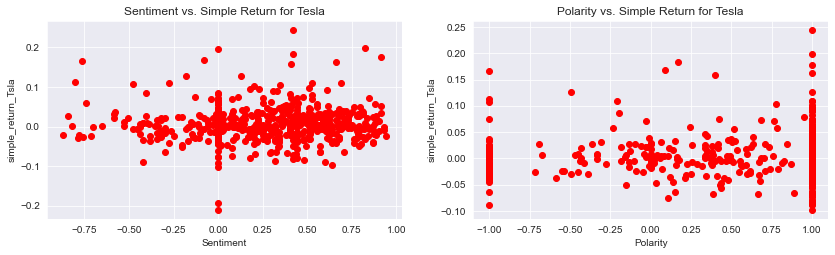

In [13]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(tesla['compound'],tesla['simple_return_Tsla'], 'o',c='r')
plt.ylabel( 'simple_return_Tsla' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Simple Return for Tesla')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(tesla['polarity'],tesla['simple_return_Tsla'], 'o',c='r')
plt.ylabel( 'simple_return_Tsla' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Simple Return for Tesla')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator

In [14]:
lm = smf.ols(formula = "simple_return_Tsla~ compound", data=tesla).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Tsla   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7773
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.378
Time:                        15:04:15   Log-Likelihood:                 1044.8
No. Observations:                 606   AIC:                            -2086.
Df Residuals:                     604   BIC:                            -2077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0049      0.002      2.324      0.0

#### Linear Regression Analysis between Simple Returns and Polarity Indicator

In [15]:
lm = smf.ols(formula = "simple_return_Tsla~ polarity", data=tesla).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Tsla   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7054
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.401
Time:                        15:04:15   Log-Likelihood:                 845.79
No. Observations:                 486   AIC:                            -1688.
Df Residuals:                     484   BIC:                            -1679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.003      2.410      0.0

#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns

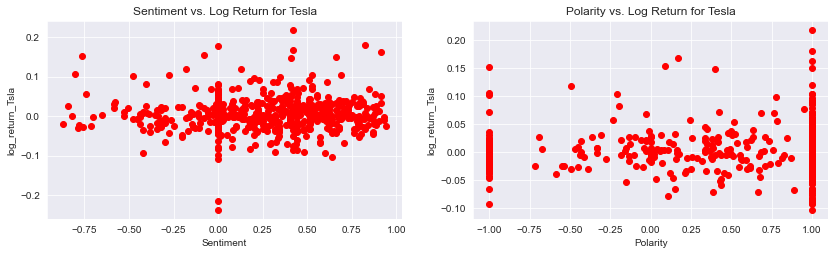

In [16]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(tesla['compound'],tesla['log_return_Tsla'], 'o',c='r')
plt.ylabel( 'log_return_Tsla' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Log Return for Tesla')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(tesla['polarity'],tesla['log_return_Tsla'], 'o',c='r')
plt.ylabel( 'log_return_Tsla' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Log Return for Tesla')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [17]:
lm = smf.ols(formula = "log_return_Tsla~ compound", data=tesla).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Tsla   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8318
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.362
Time:                        15:04:15   Log-Likelihood:                 1054.8
No. Observations:                 606   AIC:                            -2106.
Df Residuals:                     604   BIC:                            -2097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0040      0.002      1.912      0.0

#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [18]:
lm = smf.ols(formula = "log_return_Tsla~ polarity", data=tesla).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Tsla   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7078
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.401
Time:                        15:04:15   Log-Likelihood:                 860.52
No. Observations:                 486   AIC:                            -1717.
Df Residuals:                     484   BIC:                            -1709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0052      0.002      2.136      0.0

#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

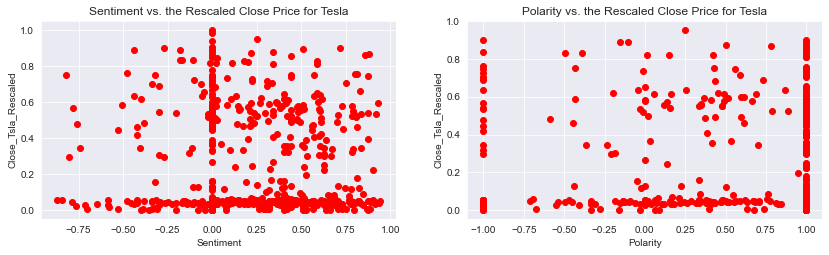

In [19]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(tesla['compound'],tesla['Close_Tsla_Rescaled'], 'o',c='r')
plt.ylabel( 'Close_Tsla_Rescaled' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. the Rescaled Close Price for Tesla')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(tesla['polarity'],tesla['Close_Tsla_Rescaled'], 'o',c='r')
plt.ylabel( 'Close_Tsla_Rescaled' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. the Rescaled Close Price for Tesla')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [20]:
lm = smf.ols(formula = "Close_Tsla_Rescaled~ compound", data=tesla).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Tsla_Rescaled   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9959
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.319
Time:                         15:04:15   Log-Likelihood:                -79.687
No. Observations:                  606   AIC:                             163.4
Df Residuals:                      604   BIC:                             172.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2499      0.014     18.35

#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [21]:
lm = smf.ols(formula = "Close_Tsla_Rescaled~ polarity", data=tesla).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Tsla_Rescaled   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.8187
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.366
Time:                         15:04:15   Log-Likelihood:                -53.122
No. Observations:                  486   AIC:                             110.2
Df Residuals:                      484   BIC:                             118.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2502      0.016     15.62

### Question: Is there any correlation between sentiments and Bitcoin Stocks? For both close price and returns

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns

Source for colors: CSS Colors, matplotlib documentation, https://matplotlib.org/stable/gallery/color/named_colors.html

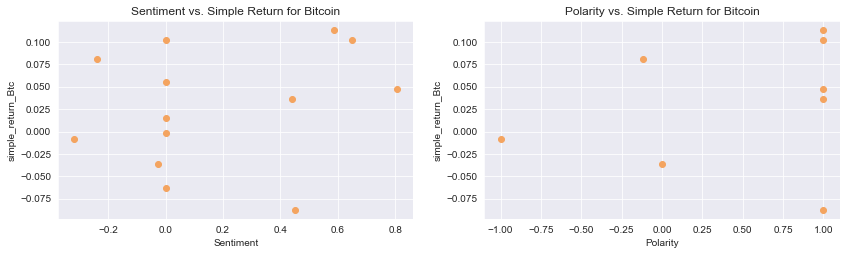

In [22]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(bitcoin['compound'],bitcoin['simple_return_Btc'], 'o',c='sandybrown')
plt.ylabel( 'simple_return_Btc' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Simple Return for Bitcoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(bitcoin['polarity'],bitcoin['simple_return_Btc'], 'o',c='sandybrown')
plt.ylabel( 'simple_return_Btc' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Simple Return for Bitcoin')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator

In [23]:
lm = smf.ols(formula = "simple_return_Btc~ compound", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:      simple_return_Btc   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.6848
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.426
Time:                        15:04:16   Log-Likelihood:                 18.044
No. Observations:                  13   AIC:                            -32.09
Df Residuals:                      11   BIC:                            -30.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0197      0.021      0.956      0.3

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Simple Returns and Polarity Indicator

In [24]:
lm = smf.ols(formula = "simple_return_Btc~ polarity", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:      simple_return_Btc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                 -0.101
Method:                 Least Squares   F-statistic:                    0.3579
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.572
Time:                        15:04:16   Log-Likelihood:                 10.645
No. Observations:                   8   AIC:                            -17.29
Df Residuals:                       6   BIC:                            -17.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0207      0.032      0.657      0.5

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns

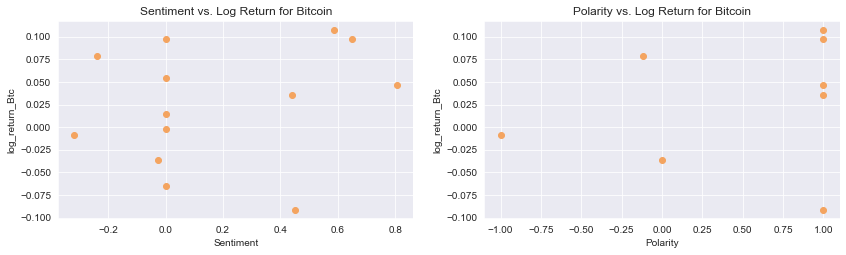

In [25]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(bitcoin['compound'],bitcoin['log_return_Btc'], 'o',c='sandybrown')
plt.ylabel( 'log_return_Btc' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Log Return for Bitcoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(bitcoin['polarity'],bitcoin['log_return_Btc'], 'o',c='sandybrown')
plt.ylabel( 'log_return_Btc' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Log Return for Bitcoin')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [26]:
lm = smf.ols(formula = "log_return_Btc~ compound", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         log_return_Btc   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.6291
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.444
Time:                        15:04:16   Log-Likelihood:                 18.213
No. Observations:                  13   AIC:                            -32.43
Df Residuals:                      11   BIC:                            -31.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0179      0.020      0.880      0.3

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [27]:
lm = smf.ols(formula = "log_return_Btc~ polarity", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         log_return_Btc   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                    0.3160
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.594
Time:                        15:04:16   Log-Likelihood:                 10.729
No. Observations:                   8   AIC:                            -17.46
Df Residuals:                       6   BIC:                            -17.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0189      0.031      0.606      0.5

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

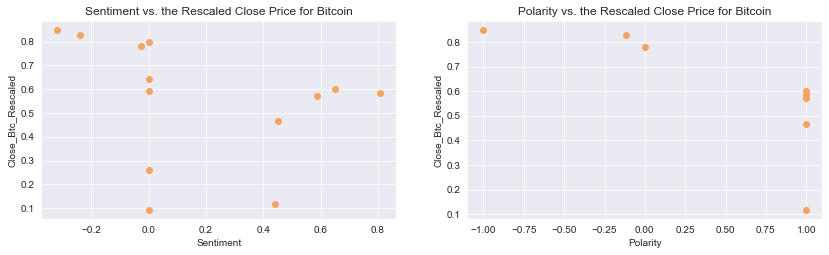

In [28]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(bitcoin['compound'],bitcoin['Close_Btc_Rescaled'], 'o',c='sandybrown')
plt.ylabel( 'Close_Btc_Rescaled' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. the Rescaled Close Price for Bitcoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(bitcoin['polarity'],bitcoin['Close_Btc_Rescaled'], 'o',c='sandybrown')
plt.ylabel( 'Close_Btc_Rescaled' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. the Rescaled Close Price for Bitcoin')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [29]:
lm = smf.ols(formula = "Close_Btc_Rescaled~ compound", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_Btc_Rescaled   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.053
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.327
Time:                        15:04:16   Log-Likelihood:                0.42313
No. Observations:                  13   AIC:                             3.154
Df Residuals:                      11   BIC:                             4.284
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5908      0.080      7.410      0.0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [30]:
lm = smf.ols(formula = "Close_Btc_Rescaled~ polarity", data=bitcoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_Btc_Rescaled   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     6.726
Date:                Wed, 07 Jun 2023   Prob (F-statistic):             0.0410
Time:                        15:04:16   Log-Likelihood:                 3.6784
No. Observations:                   8   AIC:                            -3.357
Df Residuals:                       6   BIC:                            -3.198
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7093      0.075      9.426      0.0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Question: Is there any correlation between sentiments and Dogecoin Stocks? For both close price and returns

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns

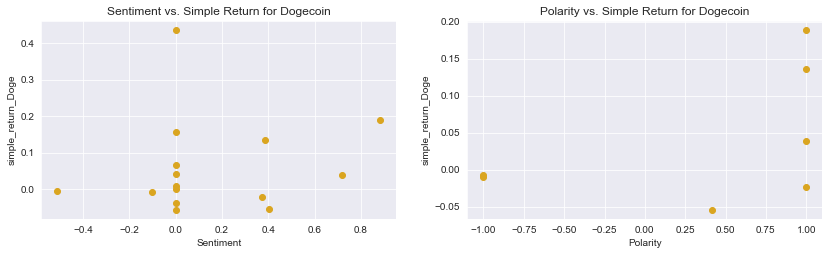

In [31]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(dogecoin['compound'],dogecoin['simple_return_Doge'], 'o',c='goldenrod')
plt.ylabel( 'simple_return_Doge' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Simple Return for Dogecoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(dogecoin['polarity'],dogecoin['simple_return_Doge'], 'o',c='goldenrod')
plt.ylabel( 'simple_return_Doge' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Simple Return for Dogecoin')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator

In [32]:
lm = smf.ols(formula = "simple_return_Doge~ compound", data=dogecoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Doge   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                    0.2996
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.593
Time:                        15:04:17   Log-Likelihood:                 10.147
No. Observations:                  15   AIC:                            -16.29
Df Residuals:                      13   BIC:                            -14.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0507      0.037      1.368      0.1

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Simple Returns and Polarity Indicator

In [33]:
lm = smf.ols(formula = "simple_return_Doge~ polarity", data=dogecoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Doge   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.431
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.285
Time:                        15:04:17   Log-Likelihood:                 8.3377
No. Observations:                   7   AIC:                            -12.68
Df Residuals:                       5   BIC:                            -12.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0229      0.035      0.648      0.5

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns

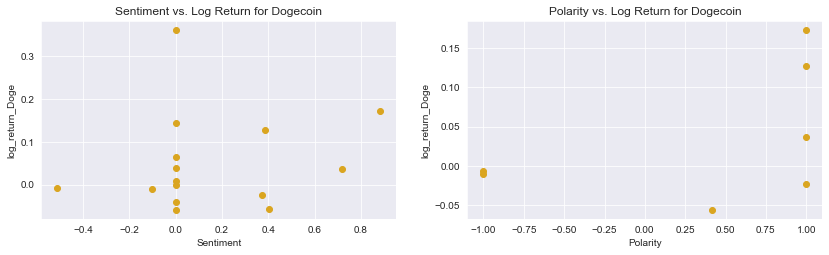

In [34]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(dogecoin['compound'],dogecoin['log_return_Doge'], 'o',c='goldenrod')
plt.ylabel( 'log_return_Doge' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. Log Return for Dogecoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(dogecoin['polarity'],dogecoin['log_return_Doge'], 'o',c='goldenrod')
plt.ylabel( 'log_return_Doge' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. Log Return for Dogecoin')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [35]:
lm = smf.ols(formula = "log_return_Doge~ compound", data=dogecoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Doge   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.046
Method:                 Least Squares   F-statistic:                    0.3865
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.545
Time:                        15:04:17   Log-Likelihood:                 12.323
No. Observations:                  15   AIC:                            -20.65
Df Residuals:                      13   BIC:                            -19.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0430      0.032      1.342      0.2

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [36]:
lm = smf.ols(formula = "log_return_Doge~ polarity", data=dogecoin).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Doge   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     1.404
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.289
Time:                        15:04:17   Log-Likelihood:                 8.7713
No. Observations:                   7   AIC:                            -13.54
Df Residuals:                       5   BIC:                            -13.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0201      0.033      0.606      0.5

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

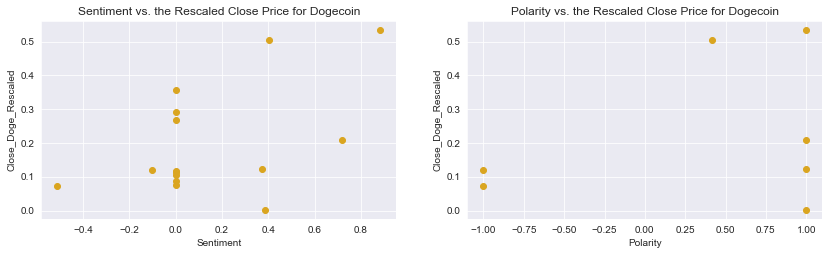

In [37]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(dogecoin['compound'],dogecoin['Close_Doge_Rescaled'], 'o',c='goldenrod')
plt.ylabel( 'Close_Doge_Rescaled' )
plt.xlabel( 'Sentiment' )
plt.title('Sentiment vs. the Rescaled Close Price for Dogecoin')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(dogecoin['polarity'],dogecoin['Close_Doge_Rescaled'], 'o',c='goldenrod')
plt.ylabel( 'Close_Doge_Rescaled' )
plt.xlabel( 'Polarity' )
plt.title('Polarity vs. the Rescaled Close Price for Dogecoin')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [38]:
lm = smf.ols(formula = "Close_Doge_Rescaled~ compound", data=dogecoin).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Doge_Rescaled   R-squared:                       0.254
Model:                             OLS   Adj. R-squared:                  0.196
Method:                  Least Squares   F-statistic:                     4.419
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):             0.0556
Time:                         15:04:17   Log-Likelihood:                 8.8871
No. Observations:                   15   AIC:                            -13.77
Df Residuals:                       13   BIC:                            -12.36
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1657      0.040      4.11

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [39]:
lm = smf.ols(formula = "Close_Doge_Rescaled~ polarity", data=dogecoin).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Doge_Rescaled   R-squared:                       0.083
Model:                             OLS   Adj. R-squared:                 -0.100
Method:                  Least Squares   F-statistic:                    0.4534
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.531
Time:                         15:04:17   Log-Likelihood:                 1.7887
No. Observations:                    7   AIC:                            0.4227
Df Residuals:                        5   BIC:                            0.3145
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2014      0.090      2.23

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### *LAG = 1*

#### Create a subset for each stock in order not to drop values for one stock in case another one appeared later 
E.g. Do not lose values for Tesla from 2010 till 2017 just because Dogecoin was not there in 2010 :)

In [40]:
tesla.reset_index(inplace=True)
bitcoin.reset_index(inplace=True)
dogecoin.reset_index(inplace=True)

In [41]:
Tsla_lags = tesla[['date', 'simple_return_Tsla_lag', 'log_return_Tsla_lag', 'Close_Tsla_Rescaled_lag', 
                     'compound_lag', 'polarity_lag1', 'Close_Tsla', 'Volume_Tsla', 
                     'simple_return_Tsla', 'log_return_Tsla', 'Close_Tsla_Rescaled']]
# Tsla_lags


Btc_lags = bitcoin[['date', 'simple_return_Btc_lag', 'log_return_Btc_lag', 'Close_Btc_Rescaled_lag', 
                     'compound_lag', 'polarity_lag1', 'Close_Btc', 'Volume_Btc', 
                    'simple_return_Btc', 'log_return_Btc','Close_Btc_Rescaled']]
# Btc_lags


Doge_lags = dogecoin[['date', 'simple_return_Doge_lag', 'log_return_Doge_lag', 'Close_Doge_Rescaled_lag', 
                     'compound_lag', 'polarity_lag1', 'Close_Doge', 'Volume_Doge', 
                     'simple_return_Doge', 'log_return_Doge','Close_Doge_Rescaled']]
# Doge_lags

In [42]:
# Drop first observation, they don't have any values because of the lag
Doge_lags = Doge_lags.dropna()
# Doge_lags

Btc_lags = Btc_lags.dropna()
# Btc_lags

Tsla_lags = Tsla_lags.dropna()
# Tsla_lags

In [43]:
Tsla_lags.set_index('date', inplace=True)
Btc_lags.set_index('date', inplace=True)
Doge_lags.set_index('date', inplace=True)

In [44]:
Tsla_lags.columns

Index(['simple_return_Tsla_lag', 'log_return_Tsla_lag',
       'Close_Tsla_Rescaled_lag', 'compound_lag', 'polarity_lag1',
       'Close_Tsla', 'Volume_Tsla', 'simple_return_Tsla', 'log_return_Tsla',
       'Close_Tsla_Rescaled'],
      dtype='object')

### Question: Is there any correlation between sentiments and Tesla Stocks? For both close price and returns with lag = 1

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns, lag = 1

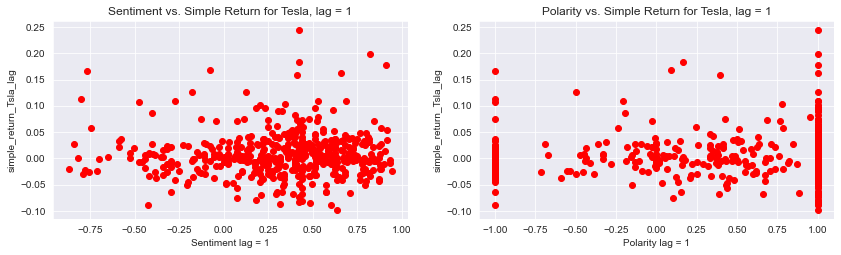

In [45]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Tsla_lags['compound_lag'],Tsla_lags['simple_return_Tsla_lag'], 'o',c='r')
plt.ylabel( 'simple_return_Tsla_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Simple Return for Tesla, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Tsla_lags['polarity_lag1'],Tsla_lags['simple_return_Tsla_lag'], 'o',c='r')
plt.ylabel( 'simple_return_Tsla_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Simple Return for Tesla, lag = 1')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator, lag = 1

In [46]:
lm = smf.ols(formula = "simple_return_Tsla_lag ~ compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     simple_return_Tsla_lag   R-squared:                       0.000
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.1247
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):              0.724
Time:                            15:04:17   Log-Likelihood:                 843.53
No. Observations:                     485   AIC:                            -1683.
Df Residuals:                         483   BIC:                            -1675.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

In [47]:
lm = smf.ols(formula = "simple_return_Tsla ~ simple_return_Tsla_lag + compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Tsla   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.022
Date:                Wed, 07 Jun 2023   Prob (F-statistic):            0.00261
Time:                        15:04:17   Log-Likelihood:                 904.88
No. Observations:                 485   AIC:                            -1804.
Df Residuals:                     482   BIC:                            -1791.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### Linear Regression Analysis between Simple Returns and Polarity Indicator, lag = 1

In [48]:
lm = smf.ols(formula = "simple_return_Tsla_lag ~ polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     simple_return_Tsla_lag   R-squared:                       0.002
Model:                                OLS   Adj. R-squared:                 -0.001
Method:                     Least Squares   F-statistic:                    0.7457
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):              0.388
Time:                            15:04:17   Log-Likelihood:                 843.84
No. Observations:                     485   AIC:                            -1684.
Df Residuals:                         483   BIC:                            -1675.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

In [49]:
lm = smf.ols(formula = "simple_return_Tsla ~ simple_return_Tsla_lag + polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Tsla   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     4.822
Date:                Wed, 07 Jun 2023   Prob (F-statistic):            0.00844
Time:                        15:04:18   Log-Likelihood:                 903.70
No. Observations:                 485   AIC:                            -1801.
Df Residuals:                     482   BIC:                            -1789.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns, lag = 1

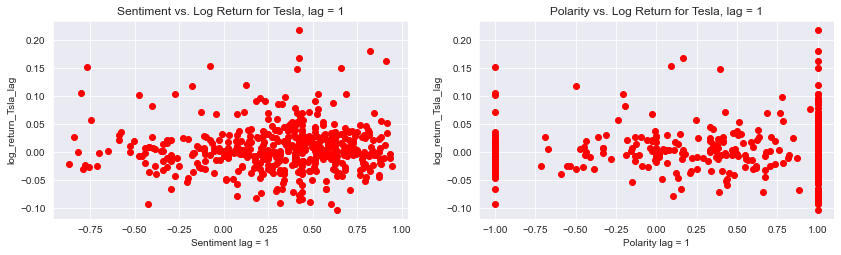

In [50]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Tsla_lags['compound_lag'],Tsla_lags['log_return_Tsla_lag'], 'o',c='r')
plt.ylabel( 'log_return_Tsla_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Log Return for Tesla, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Tsla_lags['polarity_lag1'],Tsla_lags['log_return_Tsla_lag'], 'o',c='r')
plt.ylabel( 'log_return_Tsla_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Log Return for Tesla, lag = 1')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [51]:
lm = smf.ols(formula = "log_return_Tsla_lag ~ compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     log_return_Tsla_lag   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.1337
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.715
Time:                         15:04:18   Log-Likelihood:                 858.24
No. Observations:                  485   AIC:                            -1712.
Df Residuals:                      483   BIC:                            -1704.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0060      0.002    

In [52]:
lm = smf.ols(formula = "log_return_Tsla ~ log_return_Tsla_lag + compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Tsla   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     5.153
Date:                Wed, 07 Jun 2023   Prob (F-statistic):            0.00610
Time:                        15:04:18   Log-Likelihood:                 909.21
No. Observations:                 485   AIC:                            -1812.
Df Residuals:                     482   BIC:                            -1800.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0013    

#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [53]:
lm = smf.ols(formula = "log_return_Tsla_lag ~ polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     log_return_Tsla_lag   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.7486
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.387
Time:                         15:04:18   Log-Likelihood:                 858.55
No. Observations:                  485   AIC:                            -1713.
Df Residuals:                      483   BIC:                            -1705.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0052      0.002 

In [54]:
lm = smf.ols(formula = "log_return_Tsla ~ log_return_Tsla_lag + polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Tsla   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.012
Date:                Wed, 07 Jun 2023   Prob (F-statistic):             0.0187
Time:                        15:04:18   Log-Likelihood:                 908.08
No. Observations:                 485   AIC:                            -1810.
Df Residuals:                     482   BIC:                            -1798.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0020    

#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

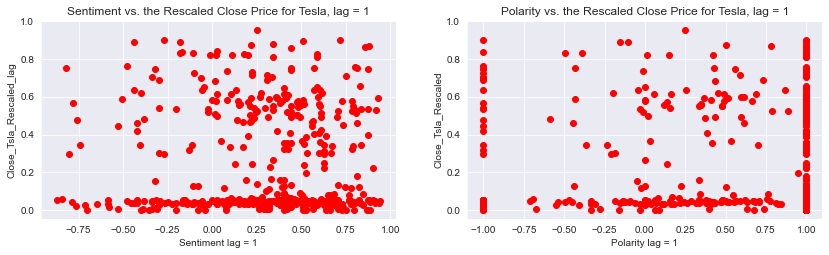

In [55]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Tsla_lags['compound_lag'],Tsla_lags['Close_Tsla_Rescaled_lag'], 'o',c='r')
plt.ylabel( 'Close_Tsla_Rescaled_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. the Rescaled Close Price for Tesla, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Tsla_lags['polarity_lag1'],Tsla_lags['Close_Tsla_Rescaled_lag'], 'o',c='r')
plt.ylabel( 'Close_Tsla_Rescaled' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. the Rescaled Close Price for Tesla, lag = 1')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [56]:
lm = smf.ols(formula = "Close_Tsla_Rescaled_lag ~ compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Close_Tsla_Rescaled_lag   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.005
Date:                     Wed, 07 Jun 2023   Prob (F-statistic):              0.317
Time:                             15:04:18   Log-Likelihood:                -53.227
No. Observations:                      485   AIC:                             110.5
Df Residuals:                          483   BIC:                             118.8
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [57]:
lm = smf.ols(formula = "Close_Tsla_Rescaled ~ Close_Tsla_Rescaled_lag + compound_lag", data=Tsla_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Tsla_Rescaled   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 7.974e+04
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                         15:04:18   Log-Likelihood:                 1353.2
No. Observations:                  485   AIC:                            -2700.
Df Residuals:                      482   BIC:                            -2688.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [58]:
lm = smf.ols(formula = "Close_Tsla_Rescaled_lag ~ polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Close_Tsla_Rescaled_lag   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.8549
Date:                     Wed, 07 Jun 2023   Prob (F-statistic):              0.356
Time:                             15:04:18   Log-Likelihood:                -53.302
No. Observations:                      485   AIC:                             110.6
Df Residuals:                          483   BIC:                             119.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [59]:
lm = smf.ols(formula = "Close_Tsla_Rescaled ~ Close_Tsla_Rescaled_lag + polarity_lag1", data=Tsla_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Tsla_Rescaled   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.997
Method:                  Least Squares   F-statistic:                 7.974e+04
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                         15:04:18   Log-Likelihood:                 1353.2
No. Observations:                  485   AIC:                            -2700.
Df Residuals:                      482   BIC:                            -2688.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

### Question: Is there any correlation between sentiments and Bitcoin Stocks? For both close price and returns with lag = 1

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns

Source for colors: CSS Colors, matplotlib documentation, https://matplotlib.org/stable/gallery/color/named_colors.html

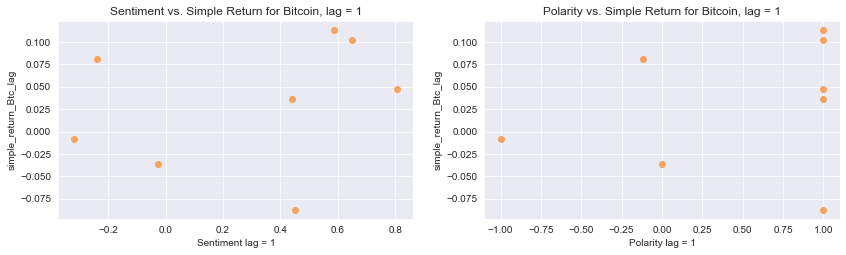

In [60]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Btc_lags['compound_lag'],Btc_lags['simple_return_Btc_lag'], 'o',c='sandybrown')
plt.ylabel( 'simple_return_Btc_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Simple Return for Bitcoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Btc_lags['polarity_lag1'],Btc_lags['simple_return_Btc_lag'], 'o',c='sandybrown')
plt.ylabel( 'simple_return_Btc_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Simple Return for Bitcoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator

In [61]:
lm = smf.ols(formula = "simple_return_Btc_lag ~ compound_lag", data=Btc_lags).fit()
print (lm.summary())

                              OLS Regression Results                             
Dep. Variable:     simple_return_Btc_lag   R-squared:                       0.078
Model:                               OLS   Adj. R-squared:                 -0.076
Method:                    Least Squares   F-statistic:                    0.5084
Date:                   Wed, 07 Jun 2023   Prob (F-statistic):              0.503
Time:                           15:04:18   Log-Likelihood:                 10.738
No. Observations:                      8   AIC:                            -17.48
Df Residuals:                          6   BIC:                            -17.32
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [62]:
lm = smf.ols(formula = "simple_return_Btc ~ simple_return_Btc_lag + compound_lag", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:      simple_return_Btc   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     1.374
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.334
Time:                        15:04:18   Log-Likelihood:                 18.698
No. Observations:                   8   AIC:                            -31.40
Df Residuals:                       5   BIC:                            -31.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.03

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Simple Returns and Polarity Indicator

In [63]:
lm = smf.ols(formula = "simple_return_Btc_lag ~ polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                              OLS Regression Results                             
Dep. Variable:     simple_return_Btc_lag   R-squared:                       0.056
Model:                               OLS   Adj. R-squared:                 -0.101
Method:                    Least Squares   F-statistic:                    0.3579
Date:                   Wed, 07 Jun 2023   Prob (F-statistic):              0.572
Time:                           15:04:18   Log-Likelihood:                 10.645
No. Observations:                      8   AIC:                            -17.29
Df Residuals:                          6   BIC:                            -17.13
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [64]:
lm = smf.ols(formula = "simple_return_Btc ~ simple_return_Btc_lag + polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:      simple_return_Btc   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     1.675
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.277
Time:                        15:04:18   Log-Likelihood:                 18.997
No. Observations:                   8   AIC:                            -31.99
Df Residuals:                       5   BIC:                            -31.76
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.03

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns

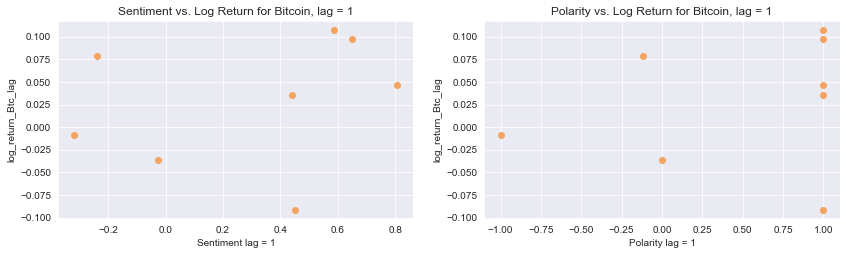

In [65]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Btc_lags['compound_lag'],Btc_lags['log_return_Btc_lag'], 'o',c='sandybrown')
plt.ylabel( 'log_return_Btc_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Log Return for Bitcoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Btc_lags['polarity_lag1'],Btc_lags['log_return_Btc_lag'], 'o',c='sandybrown')
plt.ylabel( 'log_return_Btc_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Log Return for Bitcoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [66]:
lm = smf.ols(formula = "log_return_Btc_lag ~ compound_lag", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     log_return_Btc_lag   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.082
Method:                 Least Squares   F-statistic:                    0.4702
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.519
Time:                        15:04:19   Log-Likelihood:                 10.825
No. Observations:                   8   AIC:                            -17.65
Df Residuals:                       6   BIC:                            -17.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0158      0.032      0.500   

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [67]:
lm = smf.ols(formula = "log_return_Btc ~ log_return_Btc_lag + compound_lag", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         log_return_Btc   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.316
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.347
Time:                        15:04:19   Log-Likelihood:                 18.296
No. Observations:                   8   AIC:                            -30.59
Df Residuals:                       5   BIC:                            -30.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0363      0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [68]:
lm = smf.ols(formula = "log_return_Btc_lag ~ polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     log_return_Btc_lag   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.108
Method:                 Least Squares   F-statistic:                    0.3160
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.594
Time:                        15:04:19   Log-Likelihood:                 10.729
No. Observations:                   8   AIC:                            -17.46
Df Residuals:                       6   BIC:                            -17.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0189      0.031      0.606

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [69]:
lm = smf.ols(formula = "log_return_Btc ~ log_return_Btc_lag + polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         log_return_Btc   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     1.589
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.292
Time:                        15:04:19   Log-Likelihood:                 18.572
No. Observations:                   8   AIC:                            -31.14
Df Residuals:                       5   BIC:                            -30.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0365      0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

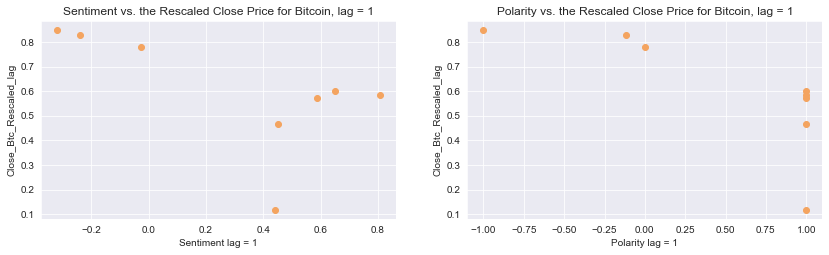

In [70]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Btc_lags['compound_lag'],Btc_lags['Close_Btc_Rescaled_lag'], 'o',c='sandybrown')
plt.ylabel( 'Close_Btc_Rescaled_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. the Rescaled Close Price for Bitcoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Btc_lags['polarity_lag1'],Btc_lags['Close_Btc_Rescaled_lag'], 'o',c='sandybrown')
plt.ylabel( 'Close_Btc_Rescaled_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. the Rescaled Close Price for Bitcoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [71]:
lm = smf.ols(formula = "Close_Btc_Rescaled_lag ~ compound_lag", data=Btc_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Close_Btc_Rescaled_lag   R-squared:                       0.375
Model:                                OLS   Adj. R-squared:                  0.271
Method:                     Least Squares   F-statistic:                     3.598
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):              0.107
Time:                            15:04:19   Log-Likelihood:                 2.5499
No. Observations:                       8   AIC:                            -1.100
Df Residuals:                           6   BIC:                           -0.9410
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [72]:
lm = smf.ols(formula = "Close_Btc_Rescaled ~ Close_Btc_Rescaled_lag + compound_lag", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_Btc_Rescaled   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.25e-05
Time:                        15:04:19   Log-Likelihood:                 19.091
No. Observations:                   8   AIC:                            -32.18
Df Residuals:                       5   BIC:                            -31.94
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [73]:
lm = smf.ols(formula = "Close_Btc_Rescaled_lag ~ polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     Close_Btc_Rescaled_lag   R-squared:                       0.529
Model:                                OLS   Adj. R-squared:                  0.450
Method:                     Least Squares   F-statistic:                     6.726
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):             0.0410
Time:                            15:04:19   Log-Likelihood:                 3.6784
No. Observations:                       8   AIC:                            -3.357
Df Residuals:                           6   BIC:                            -3.198
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [74]:
lm = smf.ols(formula = "Close_Btc_Rescaled ~ Close_Btc_Rescaled_lag + polarity_lag1", data=Btc_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     Close_Btc_Rescaled   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     224.4
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.27e-05
Time:                        15:04:19   Log-Likelihood:                 19.054
No. Observations:                   8   AIC:                            -32.11
Df Residuals:                       5   BIC:                            -31.87
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Question: Is there any correlation between sentiments and Dogecoin Stocks? For both close price and returns with lag = 1

#### Scatter plot between Sentiment and Simple Returns, Polarity vs Simple Returns

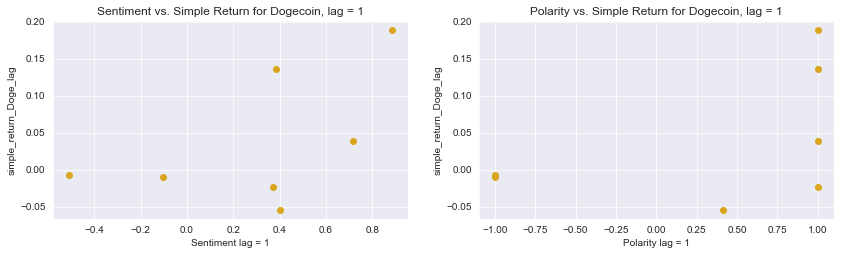

In [75]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Doge_lags['compound_lag'],Doge_lags['simple_return_Doge_lag'], 'o',c='goldenrod')
plt.ylabel( 'simple_return_Doge_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Simple Return for Dogecoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Doge_lags['polarity_lag1'],Doge_lags['simple_return_Doge_lag'], 'o',c='goldenrod')
plt.ylabel( 'simple_return_Doge_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Simple Return for Dogecoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Simple Returns and Compound Sentiment Indicator

In [76]:
lm = smf.ols(formula = "simple_return_Doge_lag~ compound_lag", data=Doge_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     simple_return_Doge_lag   R-squared:                       0.288
Model:                                OLS   Adj. R-squared:                  0.145
Method:                     Least Squares   F-statistic:                     2.019
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):              0.215
Time:                            15:04:19   Log-Likelihood:                 8.6439
No. Observations:                       7   AIC:                            -13.29
Df Residuals:                           5   BIC:                            -13.40
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercep

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [77]:
lm = smf.ols(formula = "simple_return_Doge ~ simple_return_Doge_lag + compound_lag", data=Doge_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Doge   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                 -0.292
Method:                 Least Squares   F-statistic:                    0.3217
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.742
Time:                        15:04:19   Log-Likelihood:                 10.330
No. Observations:                   7   AIC:                            -14.66
Df Residuals:                       4   BIC:                            -14.82
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Linear Regression Analysis between Simple Returns and Polarity Indicator

In [78]:
lm = smf.ols(formula = "simple_return_Doge_lag ~ polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                              OLS Regression Results                              
Dep. Variable:     simple_return_Doge_lag   R-squared:                       0.223
Model:                                OLS   Adj. R-squared:                  0.067
Method:                     Least Squares   F-statistic:                     1.431
Date:                    Wed, 07 Jun 2023   Prob (F-statistic):              0.285
Time:                            15:04:19   Log-Likelihood:                 8.3377
No. Observations:                       7   AIC:                            -12.68
Df Residuals:                           5   BIC:                            -12.78
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [79]:
lm = smf.ols(formula = "simple_return_Doge ~ simple_return_Doge_lag + polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:     simple_return_Doge   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.408
Method:                 Least Squares   F-statistic:                    0.1301
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.882
Time:                        15:04:19   Log-Likelihood:                 10.029
No. Observations:                   7   AIC:                            -14.06
Df Residuals:                       4   BIC:                            -14.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Scatter plot between Sentiment and Log Returns, Polarity vs Log Returns

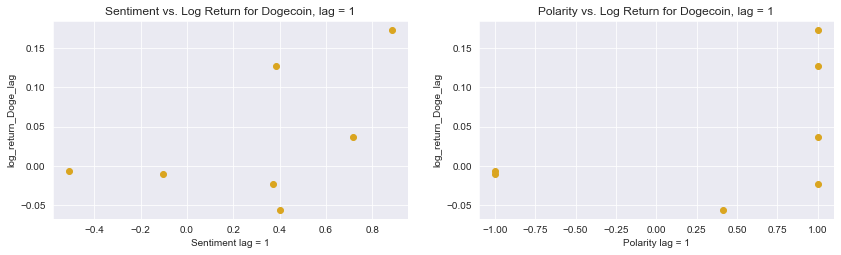

In [80]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Doge_lags['compound_lag'],Doge_lags['log_return_Doge_lag'], 'o',c='goldenrod')
plt.ylabel( 'log_return_Doge_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. Log Return for Dogecoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Doge_lags['polarity_lag1'],Doge_lags['log_return_Doge_lag'], 'o',c='goldenrod')
plt.ylabel( 'log_return_Doge_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. Log Return for Dogecoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Log Returns and Compound Sentiment Indicator

In [81]:
lm = smf.ols(formula = "log_return_Doge_lag ~ compound_lag", data=Doge_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     log_return_Doge_lag   R-squared:                       0.280
Model:                             OLS   Adj. R-squared:                  0.136
Method:                  Least Squares   F-statistic:                     1.947
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.222
Time:                         15:04:20   Log-Likelihood:                 9.0562
No. Observations:                    7   AIC:                            -14.11
Df Residuals:                        5   BIC:                            -14.22
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0058      0.036    

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [82]:
lm = smf.ols(formula = "log_return_Doge ~ log_return_Doge_lag + compound_lag", data=Doge_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Doge   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                 -0.288
Method:                 Least Squares   F-statistic:                    0.3297
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.737
Time:                        15:04:20   Log-Likelihood:                 10.556
No. Observations:                   7   AIC:                            -15.11
Df Residuals:                       4   BIC:                            -15.27
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0222    

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Linear Regression Analysis between Log Returns and Polarity Indicator

In [83]:
lm = smf.ols(formula = "log_return_Doge_lag ~ polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     log_return_Doge_lag   R-squared:                       0.219
Model:                             OLS   Adj. R-squared:                  0.063
Method:                  Least Squares   F-statistic:                     1.404
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):              0.289
Time:                         15:04:20   Log-Likelihood:                 8.7713
No. Observations:                    7   AIC:                            -13.54
Df Residuals:                        5   BIC:                            -13.65
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0201      0.033 

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [84]:
lm = smf.ols(formula = "log_return_Doge ~ log_return_Doge_lag + polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:        log_return_Doge   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                 -0.400
Method:                 Least Squares   F-statistic:                    0.1433
Date:                Wed, 07 Jun 2023   Prob (F-statistic):              0.871
Time:                        15:04:20   Log-Likelihood:                 10.264
No. Observations:                   7   AIC:                            -14.53
Df Residuals:                       4   BIC:                            -14.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0136    

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Scatter plot between Sentiment and Close Price Rescaled, Polarity vs Close Price Rescaled

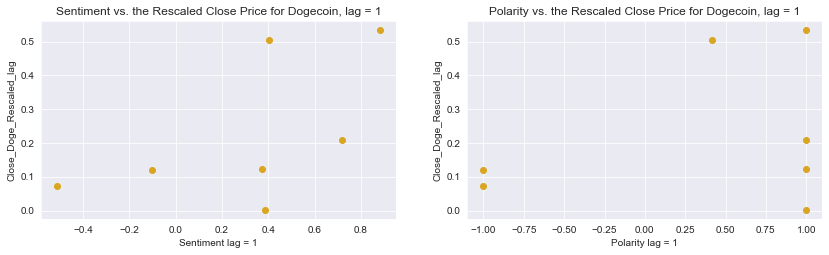

In [85]:
fig, ax = plt.subplots(1,2, figsize = (14, 8))

ax0 = plt.subplot(2, 2, 1)
ax0.plot(Doge_lags['compound_lag'],Doge_lags['Close_Doge_Rescaled_lag'], 'o',c='goldenrod')
plt.ylabel( 'Close_Doge_Rescaled_lag' )
plt.xlabel( 'Sentiment lag = 1' )
plt.title('Sentiment vs. the Rescaled Close Price for Dogecoin, lag = 1')

ax1 = plt.subplot(2, 2, 2)
ax1.plot(Doge_lags['polarity_lag1'],Doge_lags['Close_Doge_Rescaled_lag'], 'o',c='goldenrod')
plt.ylabel( 'Close_Doge_Rescaled_lag' )
plt.xlabel( 'Polarity lag = 1' )
plt.title('Polarity vs. the Rescaled Close Price for Dogecoin, lag = 1')

plt.show()

#### Linear Regression Analysis between Close Price Rescaled and Compound Sentiment Indicator

In [86]:
lm = smf.ols(formula = "Close_Doge_Rescaled_lag ~ compound_lag", data=Doge_lags).fit()
print (lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Close_Doge_Rescaled_lag   R-squared:                       0.320
Model:                                 OLS   Adj. R-squared:                  0.184
Method:                      Least Squares   F-statistic:                     2.356
Date:                     Wed, 07 Jun 2023   Prob (F-statistic):              0.185
Time:                             15:04:20   Log-Likelihood:                 2.8362
No. Observations:                        7   AIC:                            -1.672
Df Residuals:                            5   BIC:                            -1.781
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [87]:
lm = smf.ols(formula = "Close_Doge_Rescaled ~ Close_Doge_Rescaled_lag + compound_lag", data=Doge_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Doge_Rescaled   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.996
Method:                  Least Squares   F-statistic:                     691.9
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):           8.31e-06
Time:                         15:04:20   Log-Likelihood:                 22.106
No. Observations:                    7   AIC:                            -38.21
Df Residuals:                        4   BIC:                            -38.37
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


#### Linear Regression Analysis between Close Price Rescaled and Polarity Indicator

In [88]:
lm = smf.ols(formula = "Close_Doge_Rescaled_lag ~ polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Close_Doge_Rescaled_lag   R-squared:                       0.083
Model:                                 OLS   Adj. R-squared:                 -0.100
Method:                      Least Squares   F-statistic:                    0.4534
Date:                     Wed, 07 Jun 2023   Prob (F-statistic):              0.531
Time:                             15:04:20   Log-Likelihood:                 1.7887
No. Observations:                        7   AIC:                            0.4227
Df Residuals:                            5   BIC:                            0.3145
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [89]:
lm = smf.ols(formula = "Close_Doge_Rescaled ~ Close_Doge_Rescaled_lag + polarity_lag1", data=Doge_lags).fit()
print (lm.summary())

                             OLS Regression Results                            
Dep. Variable:     Close_Doge_Rescaled   R-squared:                       0.997
Model:                             OLS   Adj. R-squared:                  0.996
Method:                  Least Squares   F-statistic:                     672.9
Date:                 Wed, 07 Jun 2023   Prob (F-statistic):           8.78e-06
Time:                         15:04:20   Log-Likelihood:                 22.009
No. Observations:                    7   AIC:                            -38.02
Df Residuals:                        4   BIC:                            -38.18
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept       

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
